In [1]:
import pandas as pd
import numpy as np

C:\Users\aliju\AppData\Local\Temp\ipykernel_14928\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load merged dataset from part 2
df = pd.read_csv('dataset_part_2.csv')

In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Display missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
FlightNumber                 0
Date                         0
BoosterVersion               0
PayloadMass                  0
Orbit                        0
LaunchSite                   0
Outcome                      0
Flights                      0
GridFins                     0
Reused                       0
Legs                         0
LandingPad                  26
Block                        0
ReusedCount                  0
Serial                       0
Longitude                    0
Latitude                     0
Wikipedia_Launch_Outcome    90
dtype: int64


In [5]:
# Fill missing PayloadMass with mean
df['PayloadMass'] = pd.to_numeric(df['PayloadMass'], errors='coerce')  
mean_mass = df['PayloadMass'].mean()
df['PayloadMass'].fillna(mean_mass, inplace=True)

C:\Users\aliju\AppData\Local\Temp\ipykernel_14928\2247966739.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PayloadMass'].fillna(mean_mass, inplace=True)


In [6]:
# Create a binary Success column from Outcome
df['Success'] = df['Outcome'].apply(lambda x: 1 if 'True' in str(x) else 0)

In [7]:
# Drop irrelevant or redundant columns
columns_to_drop = ['Customer', 'BoosterLanding', 'Time', 'Payload', 'Wikipedia_Launch_Outcome']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [8]:
# Rename columns for consistency
df.rename(columns={'PayloadMass': 'PayloadMass_kg', 'LaunchSite': 'Launch_Site'}, inplace=True)


In [9]:
# Final check
print("\nCleaned dataset preview:")
print(df.head())


Cleaned dataset preview:
   FlightNumber       Date BoosterVersion  PayloadMass_kg Orbit   Launch_Site  \
0             1 2010-06-04       Falcon 9     6123.547647   LEO  CCSFS SLC 40   
1             2 2012-05-22       Falcon 9      525.000000   LEO  CCSFS SLC 40   
2             3 2013-03-01       Falcon 9      677.000000   ISS  CCSFS SLC 40   
3             4 2013-09-29       Falcon 9      500.000000    PO   VAFB SLC 4E   
4             5 2013-12-03       Falcon 9     3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Success  
0         

In [10]:
# Save cleaned dataset
df.to_csv('dataset_part_3.csv', index=False)

In [11]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass_kg,Orbit,Launch_Site,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Success
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass_kg  90 non-null     float64
 4   Orbit           90 non-null     object 
 5   Launch_Site     90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Success         90 non-null     int64

## Exploratory Data Analysis

In [12]:
!pip install ipython-sql


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%load_ext sql
%sql sqlite:///spacex.db

In [14]:
import pandas as pd
import sqlite3

# Load cleaned CSV
df = pd.read_csv('dataset_part_3.csv')

# Connect and write to SQLite
conn = sqlite3.connect('spacex.db')
df.to_sql('launch_data', conn, if_exists='replace', index=False)


90

# 1. View first 5 rows

In [15]:
%%sql
SELECT * FROM launch_data LIMIT 5;

 * sqlite:///spacex.db
Done.


FlightNumber,Date,BoosterVersion,PayloadMass_kg,Orbit,Launch_Site,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Success
1,2010-06-04,Falcon 9,6123.547647058824,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.5618571,0
2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.5618571,0
3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.5618571,0
4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.5618571,0


# 2. Count launches per launch site

In [16]:
%%sql
SELECT Launch_Site, COUNT(*) AS Launch_Count
FROM launch_data
GROUP BY Launch_Site
ORDER BY Launch_Count DESC;

 * sqlite:///spacex.db
Done.


Launch_Site,Launch_Count
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


# 3. Overall success rate

In [17]:
%%sql
SELECT 
  COUNT(*) AS Total_Launches,
  SUM(Success) AS Successful_Launches,
  ROUND(100.0 * SUM(Success) / COUNT(*), 2) AS Success_Rate_Percent
FROM launch_data;

 * sqlite:///spacex.db
Done.


Total_Launches,Successful_Launches,Success_Rate_Percent
90,60,66.67


# 4. Average payload mass per orbit

In [18]:
%%sql
SELECT Orbit, ROUND(AVG(PayloadMass_kg), 2) AS Avg_Payload_kg
FROM launch_data
GROUP BY Orbit
ORDER BY Avg_Payload_kg DESC;

 * sqlite:///spacex.db
Done.


Orbit,Avg_Payload_kg
VLEO,15428.57
PO,7583.67
SO,6123.55
GEO,6123.55
GTO,5011.99
MEO,3987.0
LEO,3890.81
ISS,3279.94
SSO,2060.0
ES-L1,570.0


# 5. Booster reuse frequency

In [19]:
%%sql
SELECT BoosterVersion, COUNT(*) AS Usage_Count
FROM launch_data
GROUP BY BoosterVersion
ORDER BY Usage_Count DESC
LIMIT 5;

 * sqlite:///spacex.db
Done.


BoosterVersion,Usage_Count
Falcon 9,90


# 6. Number of launches by year

In [20]:
%%sql
SELECT strftime('%Y', Date) AS Year, COUNT(*) AS Launches
FROM launch_data
GROUP BY Year
ORDER BY Year;

 * sqlite:///spacex.db
Done.


Year,Launches
2010,1
2012,1
2013,3
2014,6
2015,6
2016,8
2017,18
2018,18
2019,10
2020,19


# Visualization

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('dataset_part_3.csv')

# Ensure correct types
df['Date'] = pd.to_datetime(df['Date'])


# 1. Success Rate Over Time

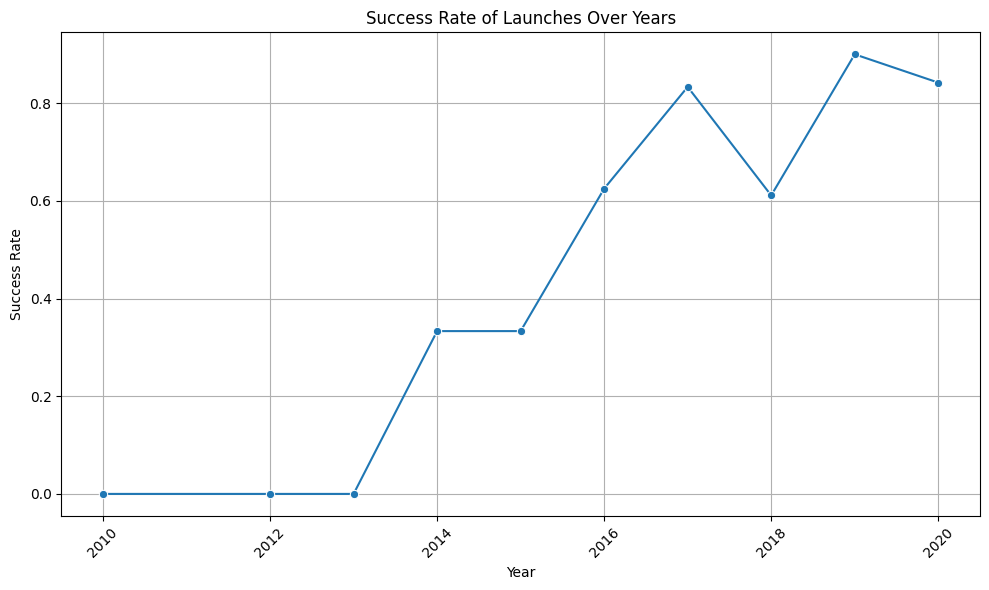

In [22]:
df_grouped = df.groupby(df['Date'].dt.year)['Success'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Success', data=df_grouped, marker='o')
plt.title('Success Rate of Launches Over Years')
plt.ylabel('Success Rate')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Launches Per Launch Site

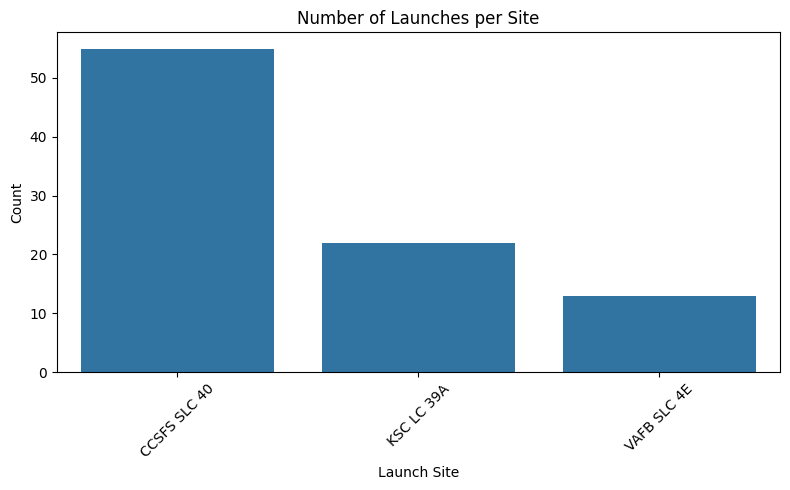

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Launch_Site', order=df['Launch_Site'].value_counts().index)
plt.title('Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.relationship between Payload and Launch Sites

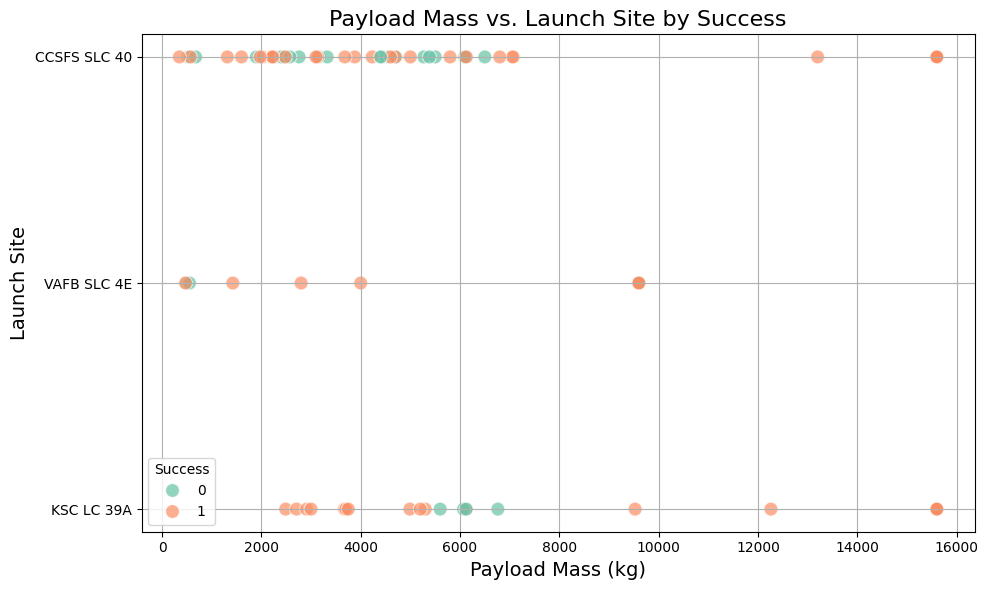

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='PayloadMass_kg',
    y='Launch_Site',
    hue='Success',  # Assuming 'Class' is renamed to 'Success'
    palette='Set2',
    s=100,
    alpha=0.7
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs. Launch Site by Success", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


# 4.Average Launch Success Rate by Orbit


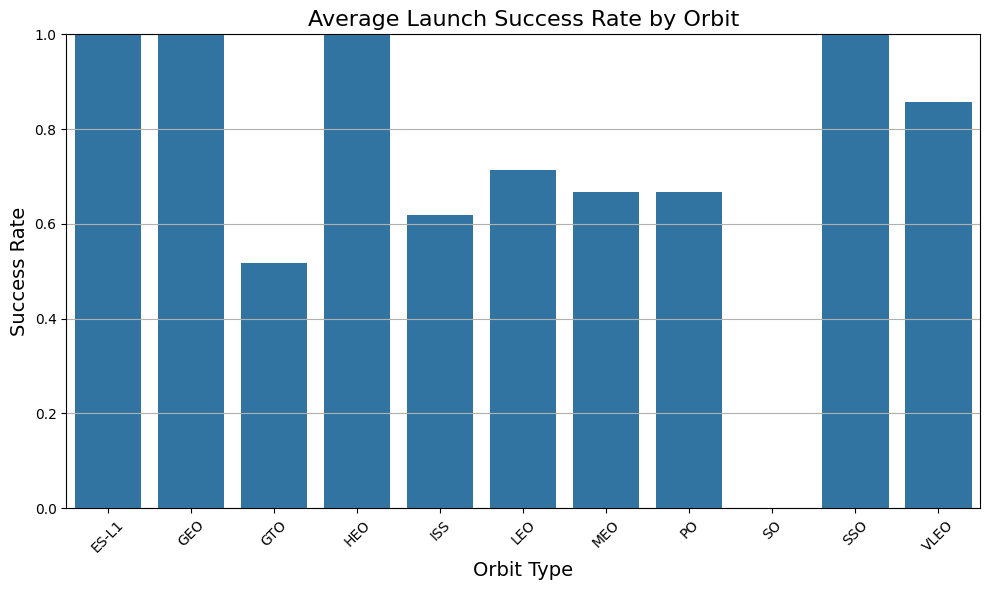

In [25]:
# Group by Orbit and calculate mean success rate
df1 = df.groupby('Orbit')['Success'].mean().reset_index()

# Plot as a bar plot (success rate in %)
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Success', data=df1)
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.title('Average Launch Success Rate by Orbit', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since Success is a rate between 0 and 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Heatmap of correlation matrix

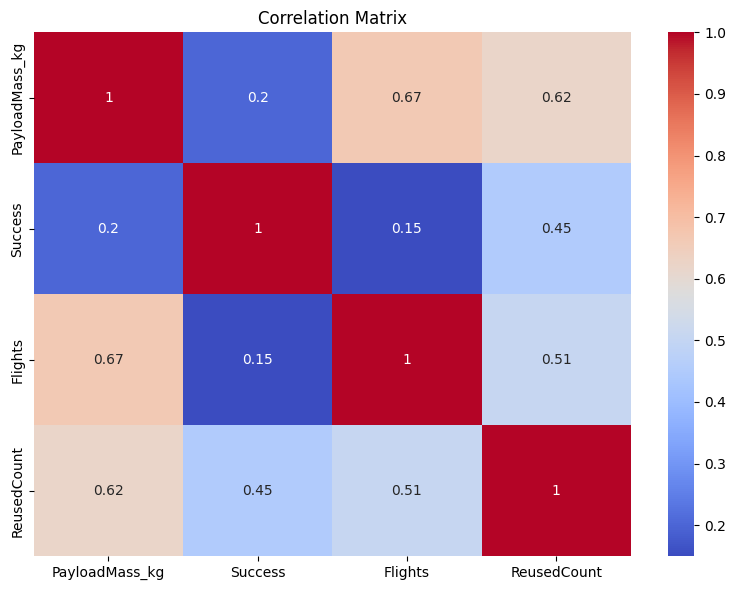

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['PayloadMass_kg', 'Success', 'Flights', 'ReusedCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Launh site location using Folium

In [27]:
import folium
import pandas as pd

In [35]:
spacex_df = df[['Launch_Site', 'Latitude', 'Longitude', 'Success']]
launch_sites_df = spacex_df.groupby(['Launch_Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch_Site', 'Latitude', 'Longitude']]
launch_sites_df

,Launch_Site,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [30]:
# Load dataset with launch site locations
df = pd.read_csv('dataset_part_3.csv')

# Create a base map
site_map = folium.Map(location=[28.5, -80.5], zoom_start=5)

# Add launch site markers
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Launch_Site'],
        icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
    ).add_to(site_map)

# Display map
site_map

In [38]:
for i, row in df.iterrows():
    outcome = 'Success' if row['Success'] == 1 else 'Failure'
    color = 'green' if outcome == 'Success' else 'red'
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        popup=f"{row['Launch_Site']} - {outcome}",
        color=color,
        fill=True
    ).add_to(site_map)
site_map

In [43]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------------- ------------------- 61.4/125.4 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from geopy.distance import geodesic


# Define a reference point (e.g., NASA Kennedy Space Center Visitor Complex)
ref_point = [28.5721, -80.6480]  # lat, lon

# Add reference marker
folium.Marker(
    ref_point,
    popup='NASA Visitor Center',
    icon=folium.Icon(color='orange')
).add_to(site_map)

# Add site markers and lines
for i, row in df.iterrows():
    site = [row['Latitude'], row['Longitude']]
    distance_km = round(geodesic(site, ref_point).km, 2)

    # Marker for launch site
    folium.Marker(
        location=site,
        popup=f"{row['Launch_Site']} ({distance_km} km)",
        icon=folium.Icon(color='blue')
    ).add_to(site_map)

    # Line between site and reference
    folium.PolyLine([site, ref_point], color='gray', dash_array='5,10').add_to(site_map)

site_map

In [45]:
from folium.plugins import MarkerCluster

# Initialize cluster layer
marker_cluster = MarkerCluster().add_to(site_map)

# Add clustered launch site markers
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Launch_Site'],
        icon=folium.Icon(color='green' if row['Success'] == 1 else 'red')
    ).add_to(marker_cluster)

site_map
